# Lab 2 - Regression and Impact Evaluation
- **Author:** Emily Aiken ([emilyaiken@berkeley.edu](mailto:emilyaiken@berkeley.edu)) (based on past labs by Qutub Khan Vajihi and Dimitris Papadimitriou)
- **Date:** February 2, 2022
- **Course:** INFO 251: Applied machine learning

### Topics:
1. Univariate regression
2. Multivariate regression
    - Dummy variables
    - Interaction terms
3. Differences-in-differences

### References: 
 * [Statsmodels](http://www.statsmodels.org/stable/example_formulas.html#loading-modules-and-functions) 
 * [Interpreting regression coefficients](https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm)
 * [Card and Krueger (1994)](https://davidcard.berkeley.edu/papers/njmin-aer.pdf)

### Import libraries

In [4]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline  

# The packages you'll need for regression models
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 1. Load the data

Card and Krueger (1994) collected survey data on employment in fast food restaurants in New Jersey and Pennsylvania in 1992. The data for today's lab uses a subset of the variables they collected.

- *UNIQUE_ID*: Unique ID for the restaurant interviewed
- *PERIOD*: 0 for pre-period (March 1994), 1 for post-period (December 1994)
- *STATE*: 0 for Pennsylvania, 1 for New Jersey
- *REGION*: Region code: 1 = Southern NJ, 2 = Central NJ, 3 = Northern NJ, 4 = Northeast Philly suburbs, 5 = Easton area, 6 = NJ Shore
- *CHAIN*: Chain restaurant code: 1 = Burger King, 2 = KFC, 3 = Roy's, 4 = Wendy's
- *EMP*: Number of employees (fulltime or parttime)
- *CO_OWNED*: 1 if company-owned
- *BONUS*: 1 if employees get a signing bonus
- *HRSOPEN*: Hours open per day, up to 24
- *NREGS*: Number of registers

In [5]:
df = pd.read_csv('fastfood.csv')
df.head()

,UNIQUE_ID,PERIOD,STATE,REGION,CHAIN,EMP,CO_OWNED,BONUS,HRSOPEN,NREGS
0,46.0,0,0.0,4,1.0,45.0,0.0,1.0,16.5,3.0
1,49.0,0,0.0,4,2.0,13.0,0.0,0.0,13.0,4.0
2,506.0,0,0.0,4,2.0,10.0,1.0,0.0,10.0,3.0
3,56.0,0,0.0,4,4.0,40.0,1.0,1.0,12.0,2.0
4,61.0,0,0.0,4,4.0,32.0,1.0,1.0,12.0,2.0


In [3]:
df.tail()

,UNIQUE_ID,PERIOD,STATE,REGION,CHAIN,EMP,CO_OWNED,BONUS,HRSOPEN,NREGS
785,423.0,1,1.0,3,2.0,22.5,1.0,1.0,12.0,3.0
786,424.0,1,1.0,3,2.0,15.0,1.0,0.0,11.0,5.0
787,426.0,1,1.0,3,3.0,30.0,1.0,0.0,19.0,5.0
788,427.0,1,1.0,3,4.0,35.0,0.0,0.0,12.5,2.0
789,428.0,1,1.0,3,4.0,34.0,0.0,0.0,12.5,2.0


In [4]:
pre = df[df['PERIOD'] == 0].copy()

### 2. Univariate Regression

Linear regression provides us a concise summary of one variable as a function of another variables(s) through two types of parameters - the slope and the intercept. To review linear regression, we'll start by exploring the relationship between employment and the number of hours a restaurant is open
in the pre-period.

#### 2.1 Exploratory analysis

In [5]:
# Find the correlation between number of rooms and median housing price.
np.corrcoef(pre['HRSOPEN'], pre['EMP'])[0][1]

0.5607581039654648

**Question:** There's a strong positive correlation between the two. Does that the number of employees is what's driving the hours a restaurant is open?

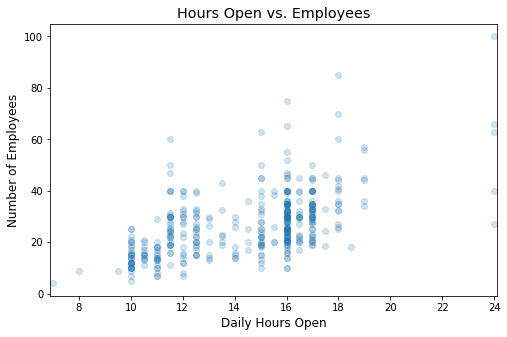

In [6]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(pre['HRSOPEN'], pre['EMP'], alpha=.2)
plt.xlabel('Daily Hours Open', fontsize='large')
plt.ylabel('Number of Employees', fontsize='large')
plt.title('Hours Open vs. Employees', fontsize='x-large')
plt.xlim(6.9, 24.1)
plt.show()

#### 2.2 Estimating a regression with np.polyfit

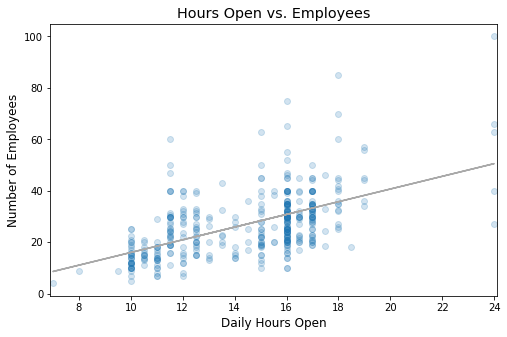

In [7]:
# Estimate the regression
x, y = pre['HRSOPEN'].values, pre['EMP'].values # x is the input variable, y is the output variable
slope, intercept = np.polyfit(x, y, 1) # 1 is the degree

# Scatterplot with the regression line
fig = plt.figure(figsize=(8, 5))
plt.scatter(pre['HRSOPEN'], pre['EMP'], alpha=.2)
plt.plot(x, slope*x + intercept, color='darkgrey')
plt.xlabel('Daily Hours Open', fontsize='large')
plt.ylabel('Number of Employees', fontsize='large')
plt.title('Hours Open vs. Employees', fontsize='x-large')
plt.xlim(6.9, 24.1)
plt.show()

#### 2.3 Interpretation of the slope and intercept

In [8]:
print('The slope of the line is %.2f' % slope)

The slope of the line is 2.47


**Question**: How would you interpret this value?

In [9]:
print('The intercept of the line is %.2f' % intercept)

The intercept of the line is -8.63


**Question**: How would you interpret this value?

#### 2.4 Estimating a regression with statsmodels

In [10]:
# Syntax option 1
x, y = pre['HRSOPEN'].values, pre['EMP'].values # x is the input variable, y is the output variable
x = sm.add_constant(x) # Add a constant for the intercept term
model1 = sm.OLS(y, x).fit() # Note the order of y folowed by x!
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     182.1
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           2.02e-34
Time:                        18:58:27   Log-Likelihood:                -1494.8
No. Observations:                 399   AIC:                             2994.
Df Residuals:                     397   BIC:                             3002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6277      2.689     -3.209      0.0

In [11]:
# Syntax option 2
model2 = smf.ols(formula='EMP ~ HRSOPEN', data=pre).fit() # Automatically includes the intercept term
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    EMP   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     182.1
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           2.02e-34
Time:                        18:58:32   Log-Likelihood:                -1494.8
No. Observations:                 399   AIC:                             2994.
Df Residuals:                     397   BIC:                             3002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6277      2.689     -3.209      0.0

### 2. Categorical Data

Now, we'll experiment with categorical data by examining the relationship between EMPTOT (the number of employees) and CHAIN (the fast food chain category) in the pre-period.

In [12]:
# Check unique values of CHAIN
pre['CHAIN'].unique()

array([1., 2., 4., 3.])

In [13]:
# Get dummy variables for CHAIN
dummy_pre = pd.get_dummies(pre, columns=['CHAIN']).head() # Pandas' default is not to drop a column
dummy_pre.head()

,UNIQUE_ID,PERIOD,STATE,REGION,EMP,CO_OWNED,BONUS,HRSOPEN,NREGS,CHAIN_1.0,CHAIN_2.0,CHAIN_3.0,CHAIN_4.0
0,46.0,0,0.0,4,45.0,0.0,1.0,16.5,3.0,1,0,0,0
1,49.0,0,0.0,4,13.0,0.0,0.0,13.0,4.0,0,1,0,0
2,506.0,0,0.0,4,10.0,1.0,0.0,10.0,3.0,0,1,0,0
3,56.0,0,0.0,4,40.0,1.0,1.0,12.0,2.0,0,0,0,1
4,61.0,0,0.0,4,32.0,1.0,1.0,12.0,2.0,0,0,0,1


In [14]:
# Get dummy variables for CHAIN and drop one column
dummy_pre = pd.get_dummies(pre, columns=['CHAIN'], drop_first=True).head() # Drop a column
dummy_pre.head()

,UNIQUE_ID,PERIOD,STATE,REGION,EMP,CO_OWNED,BONUS,HRSOPEN,NREGS,CHAIN_2.0,CHAIN_3.0,CHAIN_4.0
0,46.0,0,0.0,4,45.0,0.0,1.0,16.5,3.0,0,0,0
1,49.0,0,0.0,4,13.0,0.0,0.0,13.0,4.0,1,0,0
2,506.0,0,0.0,4,10.0,1.0,0.0,10.0,3.0,1,0,0
3,56.0,0,0.0,4,40.0,1.0,1.0,12.0,2.0,0,0,1
4,61.0,0,0.0,4,32.0,1.0,1.0,12.0,2.0,0,0,1


In [15]:
# Regression with a dummy variable: Syntax option 1
x = pd.get_dummies(pre[['CHAIN']], columns=['CHAIN'], drop_first=True)
x = sm.add_constant(x)
y = pre['EMP']
print(sm.OLS(y, x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    EMP   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     39.61
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           2.12e-22
Time:                        18:58:35   Log-Likelihood:                -1517.6
No. Observations:                 399   AIC:                             3043.
Df Residuals:                     395   BIC:                             3059.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4759      0.847     35.989      0.0

**QUESTION**: How should we interpret regression coefficients when one dummy variable is dropped?

In [16]:
# Regression with a dummy variable: Syntax option 2

# Statsmodels formula API automatically drops one of the dummies
print(smf.ols(formula='EMP ~ C(CHAIN)', data=pre).fit().summary()) 

                            OLS Regression Results                            
Dep. Variable:                    EMP   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     39.61
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           2.12e-22
Time:                        18:58:38   Log-Likelihood:                -1517.6
No. Observations:                 399   AIC:                             3043.
Df Residuals:                     395   BIC:                             3059.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.4759      0.847     

In [17]:
# Alternative: drop the constant
print(smf.ols(formula='EMP ~ C(CHAIN) - 1', data=pre).fit().summary()) 

                            OLS Regression Results                            
Dep. Variable:                    EMP   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     39.61
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           2.12e-22
Time:                        18:58:40   Log-Likelihood:                -1517.6
No. Observations:                 399   AIC:                             3043.
Df Residuals:                     395   BIC:                             3059.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
C(CHAIN)[1.0]    30.4759      0.847     35.989

### 3. Multivariate Regression

Now let's look at some other covariates: The number of registrations, whether or not employees get a bonus, and the region.

In [18]:
# Syntax 1
X = sm.add_constant(pre[['HRSOPEN', 'NREGS', 'BONUS']]) # X is capitalized since it's now a vector
y = pre['EMP']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    EMP   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     67.08
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           4.46e-35
Time:                        18:58:43   Log-Likelihood:                -1488.0
No. Observations:                 399   AIC:                             2984.
Df Residuals:                     395   BIC:                             3000.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7277      2.829     -3.439      0.0

In [19]:
# Syntax 2
model = smf.ols(formula='EMP ~ HRSOPEN + NREGS + C(REGION)', data=pre).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    EMP   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     36.42
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           4.93e-35
Time:                        18:58:43   Log-Likelihood:                -1481.7
No. Observations:                 399   AIC:                             2977.
Df Residuals:                     392   BIC:                             3005.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.9948      2.816     -3.

**QUESTION**: Interpret each of the regression coefficients.

#### 3.1 Interaction Terms

Interaction terms are used to (1) expand the set of hypothesis and/or controls in a regression, and (2) model relationships in more complex econometric models (e.g. differences-in-differences, instrumental variables).

In [20]:
model1 = smf.ols(formula='EMP ~ HRSOPEN * BONUS ', data=pre).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    EMP   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     70.30
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           1.89e-36
Time:                        18:58:45   Log-Likelihood:                -1484.8
No. Observations:                 399   AIC:                             2978.
Df Residuals:                     395   BIC:                             2993.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -14.0466      2.968     -4.732

**QUESTION**: Interpret each coefficient.

### 4. Differences-in-differences

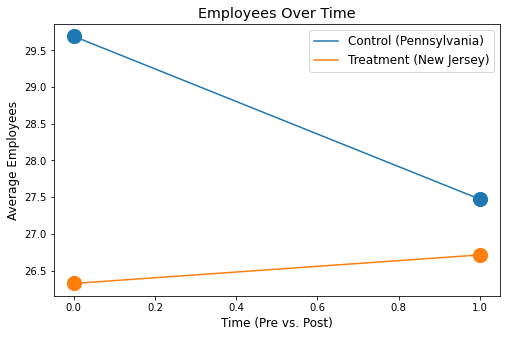

In [21]:
# Visual assessment of the dif-in-dif
control_pre = df[(df['PERIOD'] == 0) & (df['STATE'] == 0)]['EMP'].mean()
treatment_pre = df[(df['PERIOD'] == 0) & (df['STATE'] == 1)]['EMP'].mean()
control_post = df[(df['PERIOD'] == 1) & (df['STATE'] == 0)]['EMP'].mean()
treatment_post = df[(df['PERIOD'] == 1) & (df['STATE'] == 1)]['EMP'].mean()

fig = plt.figure(figsize=(8, 5))
plt.scatter([0, 1], [control_pre, control_post], s=200)
plt.plot([0, 1], [control_pre, control_post], label='Control (Pennsylvania)')
plt.scatter([0, 1], [treatment_pre, treatment_post], s=200)
plt.plot([0, 1], [treatment_pre, treatment_post], label='Treatment (New Jersey)')
plt.legend(loc='best', fontsize='large')
plt.xlabel('Time (Pre vs. Post)', fontsize='large')
plt.ylabel('Average Employees', fontsize='large')
plt.title('Employees Over Time', fontsize='x-large')
plt.show()


In [22]:
# TODO: Use a differences-in-differences specification to estimate the impact of the increase in the 
# minimum wage in New Jersey (state == 1) between the pre- and the post-period (period==1). 

# Remember the dif-in-dif formula: Y = B0 + B1*Time + B2*Intervention + B3*(Time*Intervention)

In [389]:
# Syntax 1
df['PERIOD*STATE'] = df['PERIOD']*df['STATE']
X = sm.add_constant(df[['STATE', 'PERIOD', 'PERIOD*STATE']])
y = df['EMP']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    EMP   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.687
Date:                Sun, 30 Jan 2022   Prob (F-statistic):              0.168
Time:                        14:41:43   Log-Likelihood:                -3093.6
No. Observations:                 790   AIC:                             6195.
Df Residuals:                     786   BIC:                             6214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           29.6923      1.379     21.536   

In [390]:
# Syntax 1
model = smf.ols(formula='EMP ~ PERIOD + STATE + PERIOD*STATE', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    EMP   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.687
Date:                Sun, 30 Jan 2022   Prob (F-statistic):              0.168
Time:                        14:41:49   Log-Likelihood:                -3093.6
No. Observations:                 790   AIC:                             6195.
Df Residuals:                     786   BIC:                             6214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       29.6923      1.379     21.536   

**QUESTION**: Interpret the regression coefficients in terms of the impact of the minimum wage change on employment.

**QUESTION**: Why might you want to add control variables to this regression?

In [391]:
model = smf.ols(formula='EMP ~ PERIOD + STATE + PERIOD*STATE + BONUS + CO_OWNED + C(CHAIN) + C(REGION)', 
                data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    EMP   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     25.51
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           2.14e-45
Time:                        14:42:18   Log-Likelihood:                -2974.4
No. Observations:                 790   AIC:                             5973.
Df Residuals:                     778   BIC:                             6029.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          22.9261      0.752     

In [25]:
df.describe().iloc[[2, 3]]

,UNIQUE_ID,PERIOD,STATE,REGION,CHAIN,EMP,CO_OWNED,BONUS,HRSOPEN,NREGS
std,148.729928,0.500291,0.396403,1.219702,1.102066,12.192632,0.475855,0.432185,2.822139,1.254383
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000


In [27]:
df.describe().iloc[[2, 3]]

,UNIQUE_ID,PERIOD,STATE,REGION,CHAIN,EMP,CO_OWNED,BONUS,HRSOPEN,NREGS
std,148.729928,0.500291,0.396403,1.219702,1.102066,12.192632,0.475855,0.432185,2.822139,1.254383
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000


In [26]:
pd.concat([df.describe(), df.describe()])

,UNIQUE_ID,PERIOD,STATE,REGION,CHAIN,EMP,CO_OWNED,BONUS,HRSOPEN,NREGS
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,247.777215,0.494937,0.805063,2.687342,2.105063,26.922152,0.345570,0.248101,14.446203,3.612658
std,148.729928,0.500291,0.396403,1.219702,1.102066,12.192632,0.475855,0.432185,2.822139,1.254383
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000
25%,120.000000,0.000000,1.000000,2.000000,1.000000,18.125000,0.000000,0.000000,12.000000,3.000000
50%,239.500000,0.000000,1.000000,3.000000,2.000000,26.000000,0.000000,0.000000,15.500000,3.000000
75%,374.500000,1.000000,1.000000,3.000000,3.000000,34.000000,1.000000,0.000000,16.000000,4.000000
max,522.000000,1.000000,1.000000,5.000000,4.000000,100.000000,1.000000,1.000000,24.000000,8.000000
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,247.777215,0.494937,0.805063,2.687342,2.105063,26.922152,0.345570,0.248101,14.446203,3.612658


In [30]:
pd.DataFrame(df.median()).T

,UNIQUE_ID,PERIOD,STATE,REGION,CHAIN,EMP,CO_OWNED,BONUS,HRSOPEN,NREGS
0,239.5,0.0,1.0,3.0,2.0,26.0,0.0,0.0,15.5,3.0
